In [1]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import skimage as ski

In [2]:
(images, _), (_, _) = mnist.load_data()
print(images.shape)
flattened = images.reshape(images.shape[0], -1)
print(flattened.shape)

# SVD
svd = TruncatedSVD(n_components=(28*28) - 1)
X_svd = svd.fit_transform(flattened)

(60000, 28, 28)
(60000, 784)


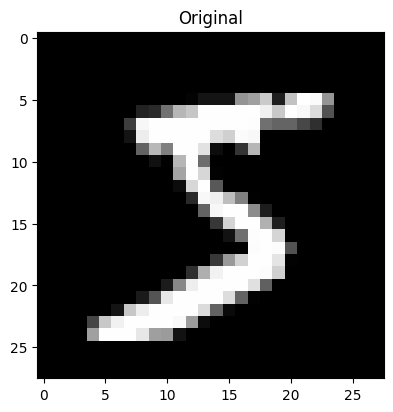

<Figure size 640x480 with 0 Axes>

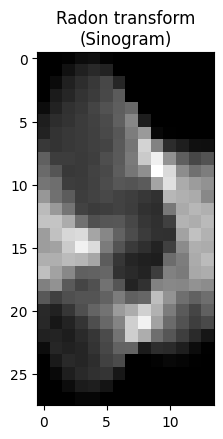

(28, 14)


<Figure size 640x480 with 0 Axes>

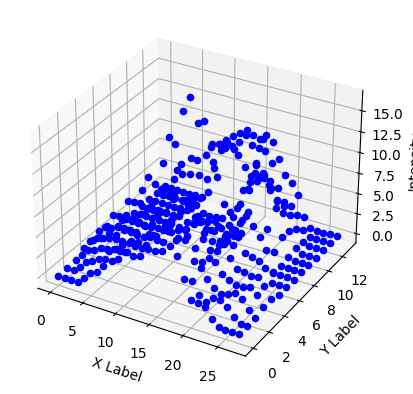

<Figure size 640x480 with 0 Axes>

In [19]:
image = images[0,:]
# image = ski.transform.rescale(image, scale=0.4, mode='reflect', channel_axis=None)

fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))

ax.set_title("Original")
ax.imshow(image, cmap=plt.cm.Greys_r)

plt.show()
plt.savefig('radon.png')

fig, ax = plt.subplots(1, 1, figsize=(8, 4.5))
theta = np.linspace(0., 180., 14, endpoint=False)
sinogram = ski.transform.radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax.set_title("Radon transform\n(Sinogram)")
# ax.set_xlabel("Projection angle (deg)")
# ax.set_ylabel("Projection position (pixels)")
# ax.imshow(sinogram, cmap=plt.cm.Greys_r,
 #          extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
  #         aspect='auto')

ax.imshow(sinogram, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()
plt.savefig('radon_tran.png')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

print(sinogram.shape)

for i in list(range(14)):
    for j in list(range(28)):
        ax.scatter(j, i, sinogram[j][i], color='blue')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Intensity')

plt.show()
plt.savefig('rad.png')

In [20]:
radon_tran = np.zeros([60000, 392])
counter = 0

for img in images:
    sinogram = ski.transform.radon(img, theta=theta)
    sin_flat = sinogram.reshape((392, ))
    radon_tran[counter,:] = sin_flat
    counter += 1 


# SVD
U, E, V = np.linalg.svd(radon_tran, full_matrices=False)

In [21]:
print(radon_tran.shape)

(60000, 392)


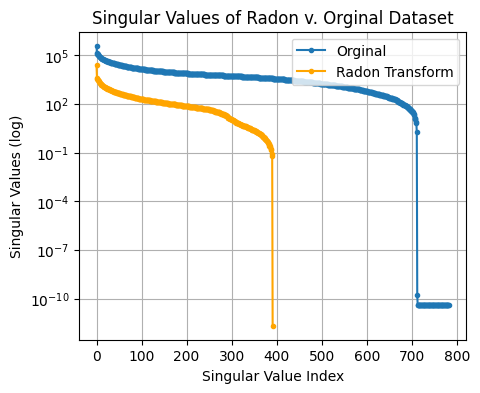

In [22]:
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(svd.singular_values_, marker='o', markersize=3, label='Orginal')
plt.title("Singular Values of Original Dataset")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Values (log)")

plt.plot(E, marker='o', color='orange', markersize=3, label='Radon Transform')
plt.title("Singular Values of Radon v. Orginal Dataset")
plt.grid(True)
plt.yscale('log')
plt.legend(loc='upper right')
# plt.figure(figsize=(16,32))

plt.subplots_adjust(wspace=0.5)
plt.show()

In [7]:
def reconstruct_images(U, E, V_t, num_components):
    reconstucted_images = np.dot(U[:, :num_components], np.dot(np.diag(E[:num_components]), V_t[:num_components, :]))
    return reconstucted_images




In [ ]:
def plot_reconstructed_images(imgs, U, E, V, num_components=1):
    reconstucted_images = reconstruct_images(U, E, V, num_components)

    norm_image = ski.transform.iradon(reconstucted_images[0].reshape(28,25), theta=np.linspace(0., 180., 20, endpoint=False))
    fig, ax = plt.subplots(1, 2, figsize=(16,4))
    ax[0].imshow(imgs, cmap='gray')
    ax[1].imshow(norm_image, cmap='gray')

    plt.show()

In [15]:
def plot_reconstructed_images(imgs, U, E, V, num_components=1):
    reconstucted_images = reconstruct_images(U, E, V, num_components)

    norm_image = ski.transform.iradon(reconstucted_images[0].reshape(28,20), theta=np.linspace(0., 180., 20, endpoint=False))
    fig, ax = plt.subplots(1, 1, figsize=(16,4))
    # ax[0].imshow(imgs, cmap='gray')
    ax.imshow(norm_image, cmap='gray')

    plt.show()

In [16]:
reconstucted_images = reconstruct_images(U, E, V, 1)

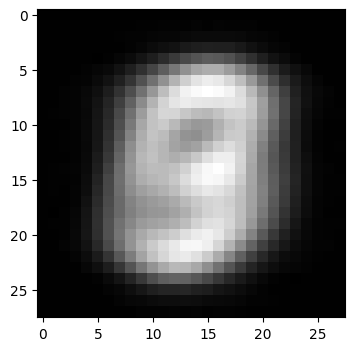

In [18]:
plot_reconstructed_images(reconstucted_images[0].reshape(28,20), U, E, V)